<a id='workflow'></a>
## Opinon Dynamic models ([to top](#top))

Models op opinion evolution in a population.

Opinions are at the base of human behaviour, models are devised to:
- understand behaviour: which mechanisms are important?
- trigger changes in behaviour: study intervention methods to foster/reduce spreading

In [2]:
import ndlib
import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.opinions as op
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend

g=nx.read_gexf('final_net.gexf', node_type=int)

<a id="discrete"></a>
## Discrete Opinion models ([to top](#top))

Agents opinions vary in the discrete set [0, 1]

<a id="voter"></a>
### Voter Model ([to top](#top))

Originally introduced to analyse competition of species, then applied to electoral competitions.

Discrete opinions: {-1, 1}

Iteration:
- A random agent i is selected with one of its neighbors j
- i takes j’s opinion


In [4]:
model1 = op.VoterModel(g)
config1 = mc.Configuration()
config1.add_model_parameter('fraction_infected', 0.3)
model1.set_initial_status(config1)
iterations1 = model1.iteration_bunch(2000) #the number of iterations to execute
trends1 = model1.build_trends(iterations1)

model2 = op.VoterModel(g)
config2 = mc.Configuration()
config2.add_model_parameter('fraction_infected', 0.5)
model2.set_initial_status(config2)
iterations2 = model2.iteration_bunch(2000) #the number of iterations to execute
trends2 = model2.build_trends(iterations2)

model3 = op.VoterModel(g)
config3 = mc.Configuration()
config3.add_model_parameter('fraction_infected', 0.8)
model3.set_initial_status(config3)
iterations3 = model3.iteration_bunch(2000) #the number of iterations to execute
trends3 = model3.build_trends(iterations3)

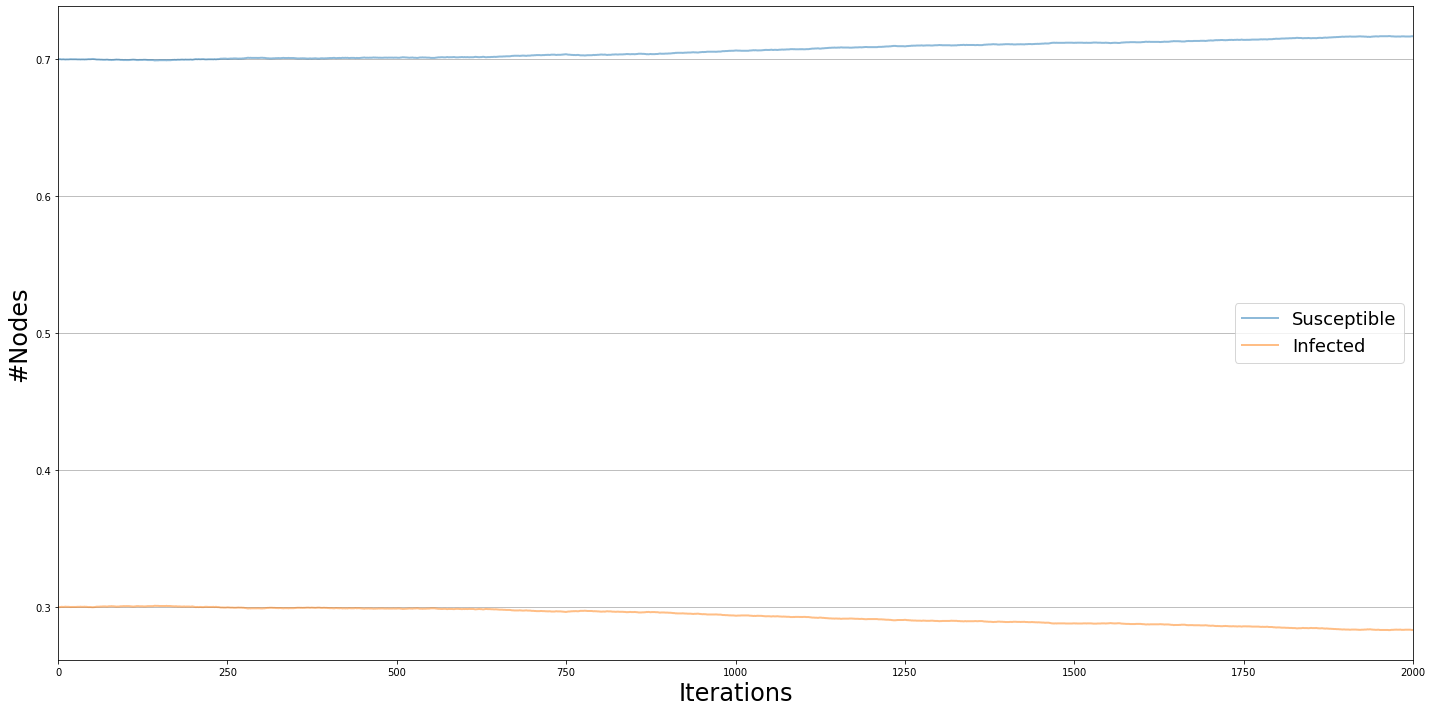

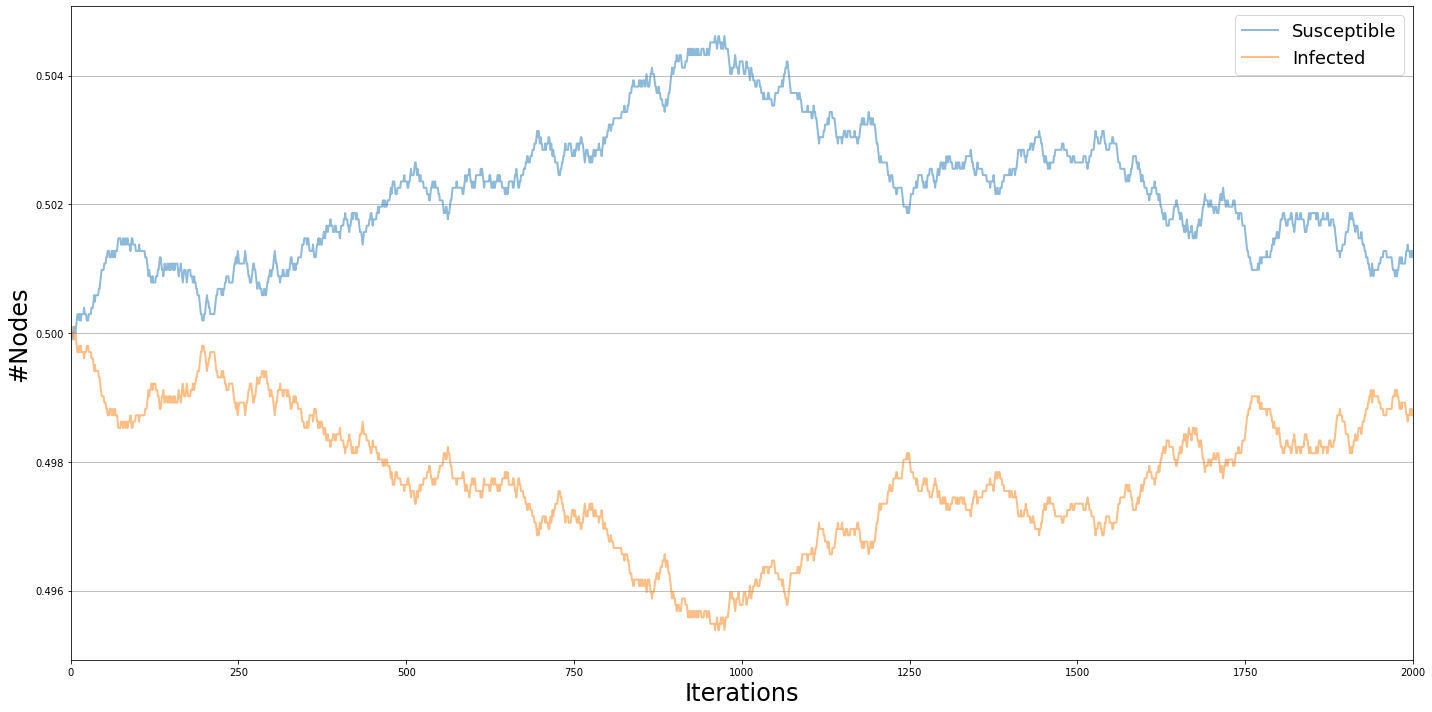

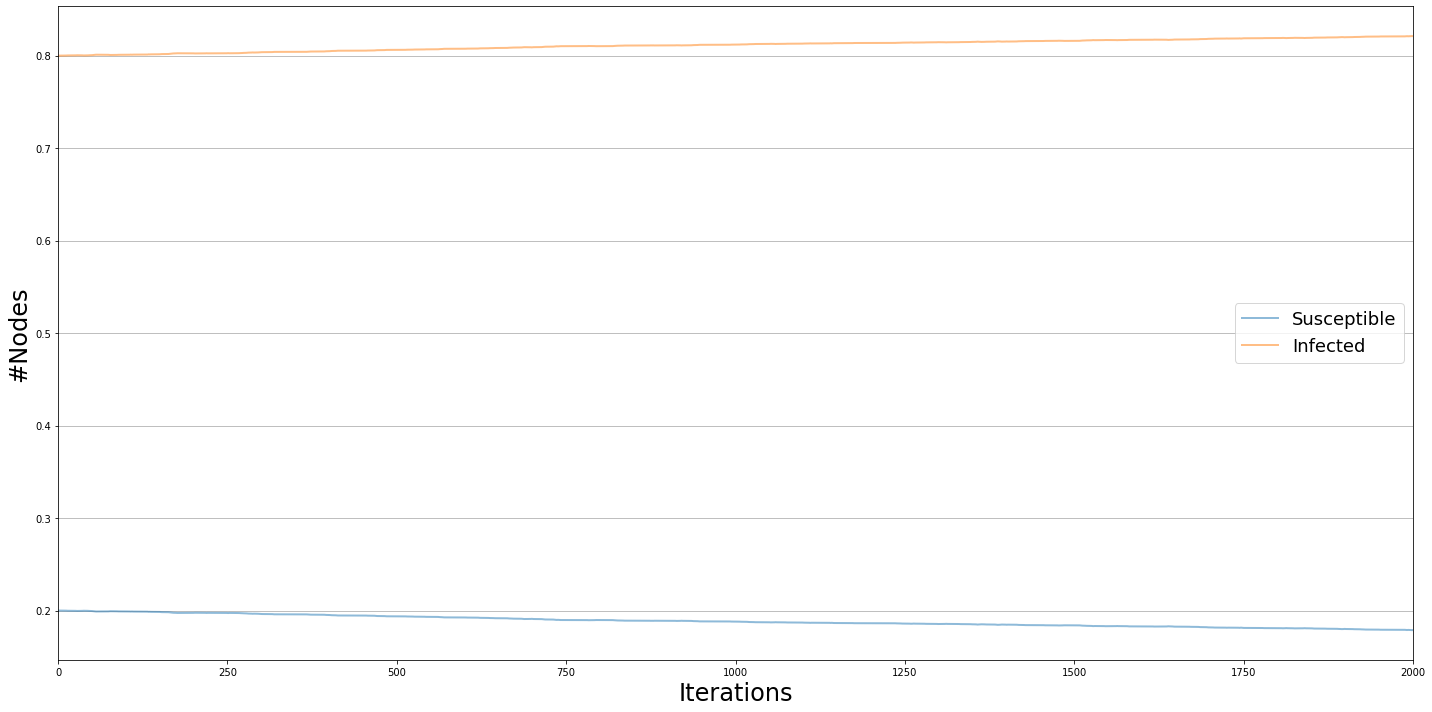

In [17]:
ax0=DiffusionTrend(model1, trends1)
ax1=DiffusionTrend(model2, trends2)
ax2=DiffusionTrend(model3, trends3)
ax0.plot()
ax1.plot()
ax2.plot()
#plt.savefig("Voter.png")

<a id="majority"></a>
### Majority Rule ([to top](#top))

Originally introduced to describe public debates (e.g., global warming, H1N1 pandemic).

Discrete opinions: {-1, 1}

Iteration:
- A random group of r agents is selected
- The agents take the majority opinion within the group

**r odd:**  majority always exists

**r even:** possibility of tied configurations. To address them, bias toward an opinion is introduced (social inertia)


In [21]:
model1 = op.MajorityRuleModel(g)
config1 = mc.Configuration()
config1.add_model_parameter('q', 5)
config1.add_model_parameter('fraction_infected', 0.3)
model1.set_initial_status(config1)
iterations1 = model1.iteration_bunch(2000)
trends1 = model1.build_trends(iterations1)

model2 = op.MajorityRuleModel(g)
config2 = mc.Configuration()
config2.add_model_parameter('q', 5)
config2.add_model_parameter('fraction_infected', 0.5)
model2.set_initial_status(config2)
iterations2 = model2.iteration_bunch(2000)
trends2 = model2.build_trends(iterations2)

model3 = op.MajorityRuleModel(g)
config3 = mc.Configuration()
config3.add_model_parameter('q', 5)
config3.add_model_parameter('fraction_infected', 0.8)
model3.set_initial_status(config3)
iterations3 = model3.iteration_bunch(2000)
trends3 = model3.build_trends(iterations3)

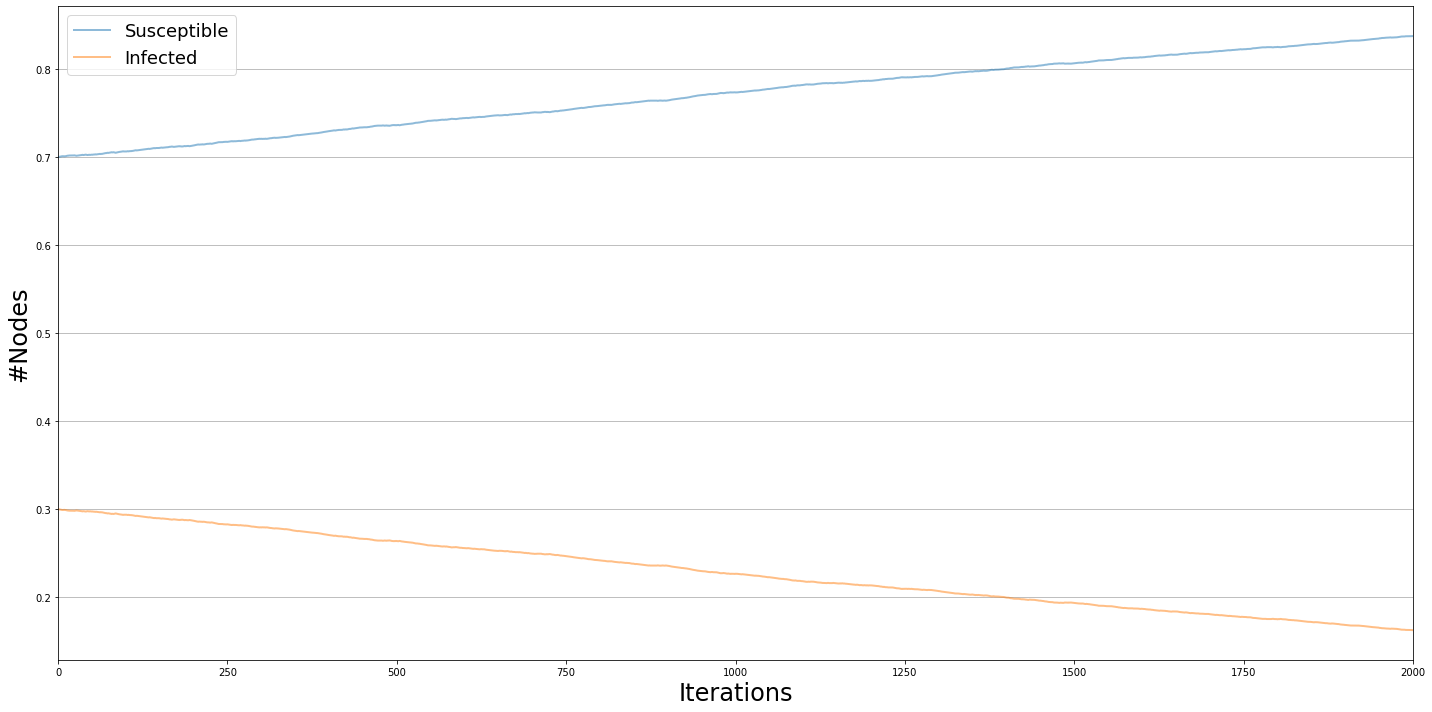

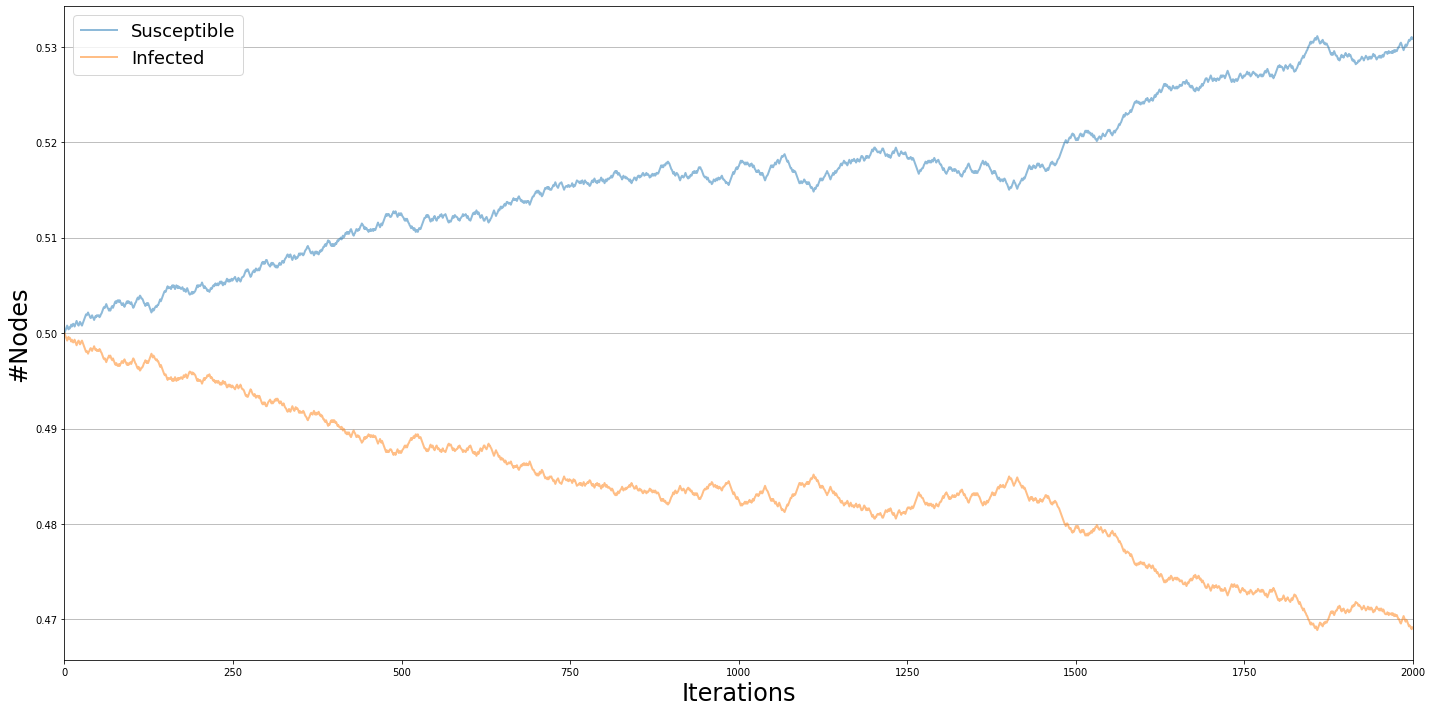

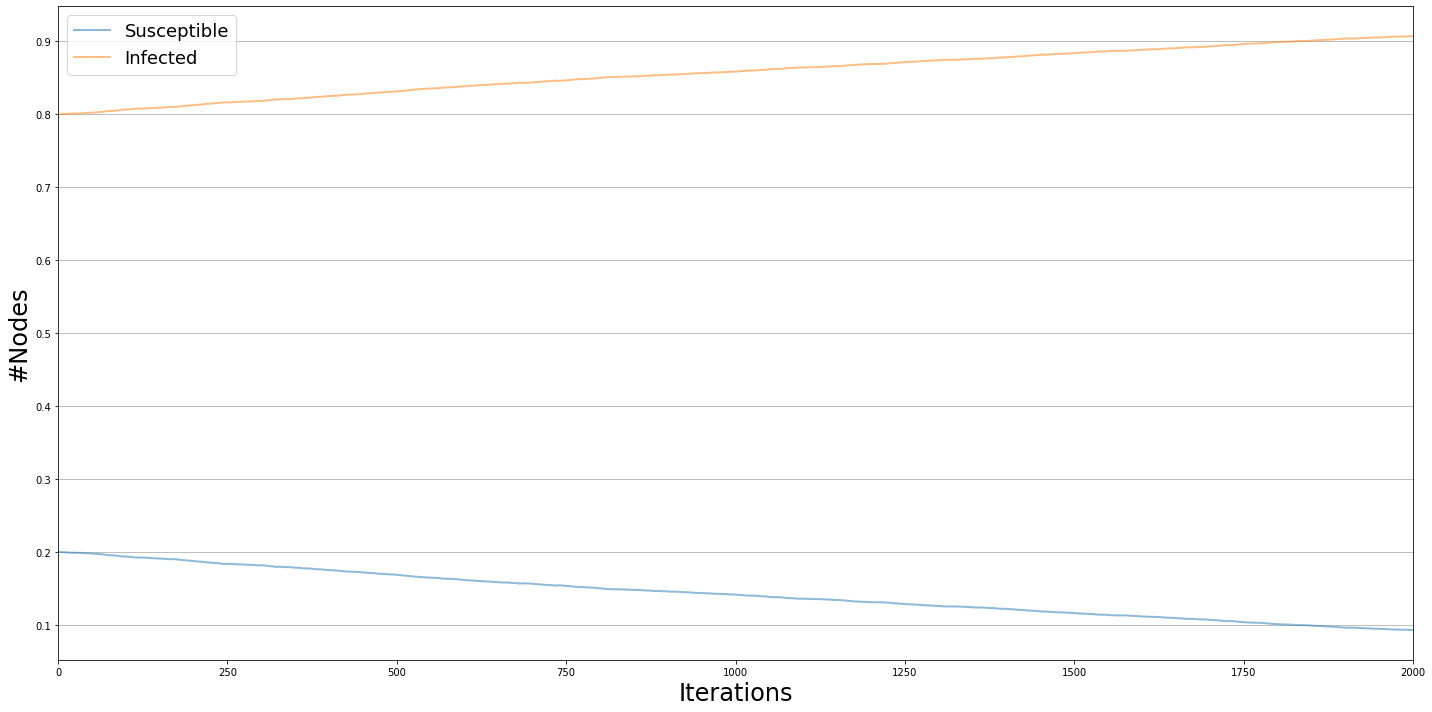

In [23]:
%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz1 = DiffusionTrend(model1, trends1)
viz2 = DiffusionTrend(model2, trends2)
viz3 = DiffusionTrend(model3, trends3)
viz1.plot()
viz2.plot()
viz3.plot()

<a id="sznajd"></a>
### Sznajd ([to top](#top))

A group of individuals having the same opinion can influence their neighbors more than a single individual

Discrete opinions: {-1, 1}

Iteration:
- A random agent i is selected with one of its neighbors j
- if i and j opinions coincide all their neighbors take that opinion, otherwise the neighbors take contrasting opinions

The model converge to one of the two contrasting stationary states


In [24]:
model1 = op.SznajdModel(g)
config1 = mc.Configuration()
config1.add_model_parameter('fraction_infected', 0.3)
model1.set_initial_status(config1)
iterations1 = model1.iteration_bunch(2000) #the number of iterations to execute
trends1 = model1.build_trends(iterations1)

model2 = op.SznajdModel(g)
config2 = mc.Configuration()
config2.add_model_parameter('fraction_infected', 0.5)
model2.set_initial_status(config2)
iterations2 = model2.iteration_bunch(2000) #the number of iterations to execute
trends2 = model2.build_trends(iterations2)

model3 = op.SznajdModel(g)
config3 = mc.Configuration()
config3.add_model_parameter('fraction_infected', 0.8)
model3.set_initial_status(config3)
iterations3 = model3.iteration_bunch(2000) #the number of iterations to execute
trends3 = model3.build_trends(iterations3)

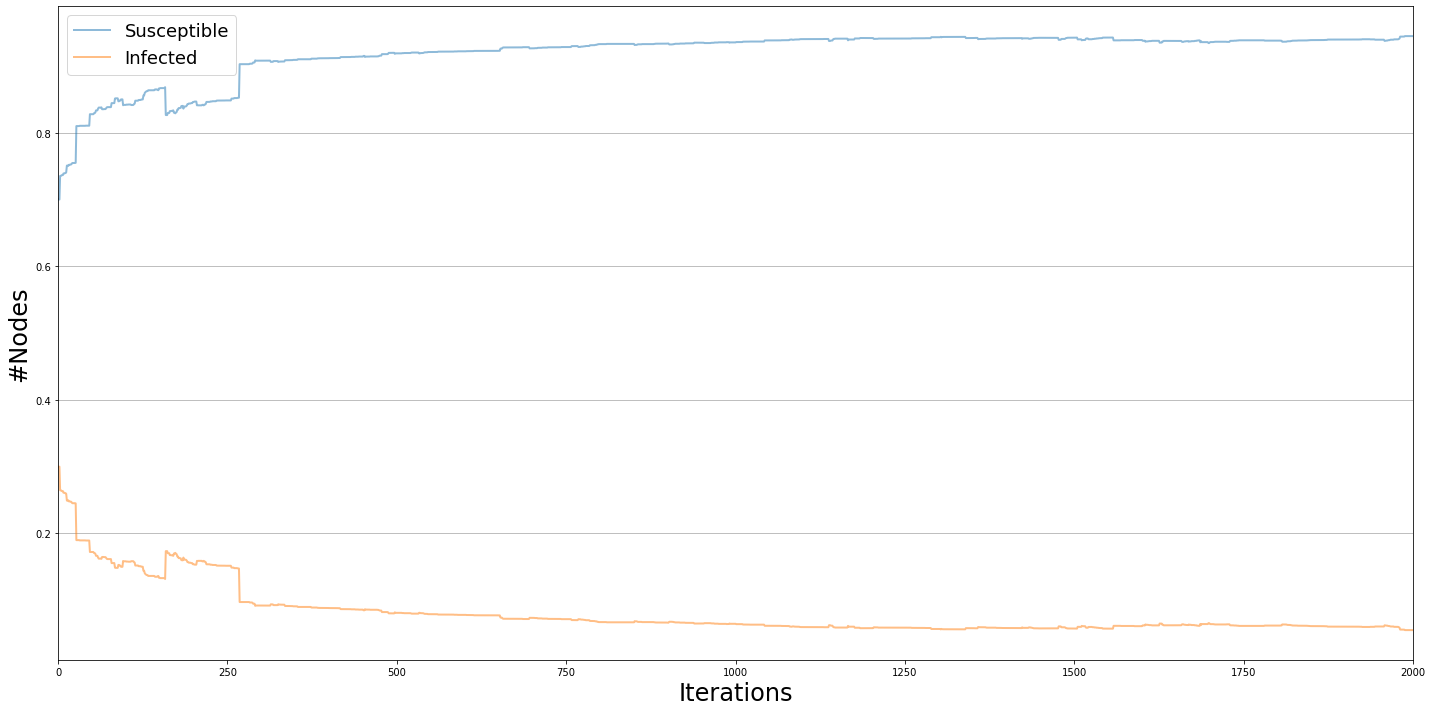

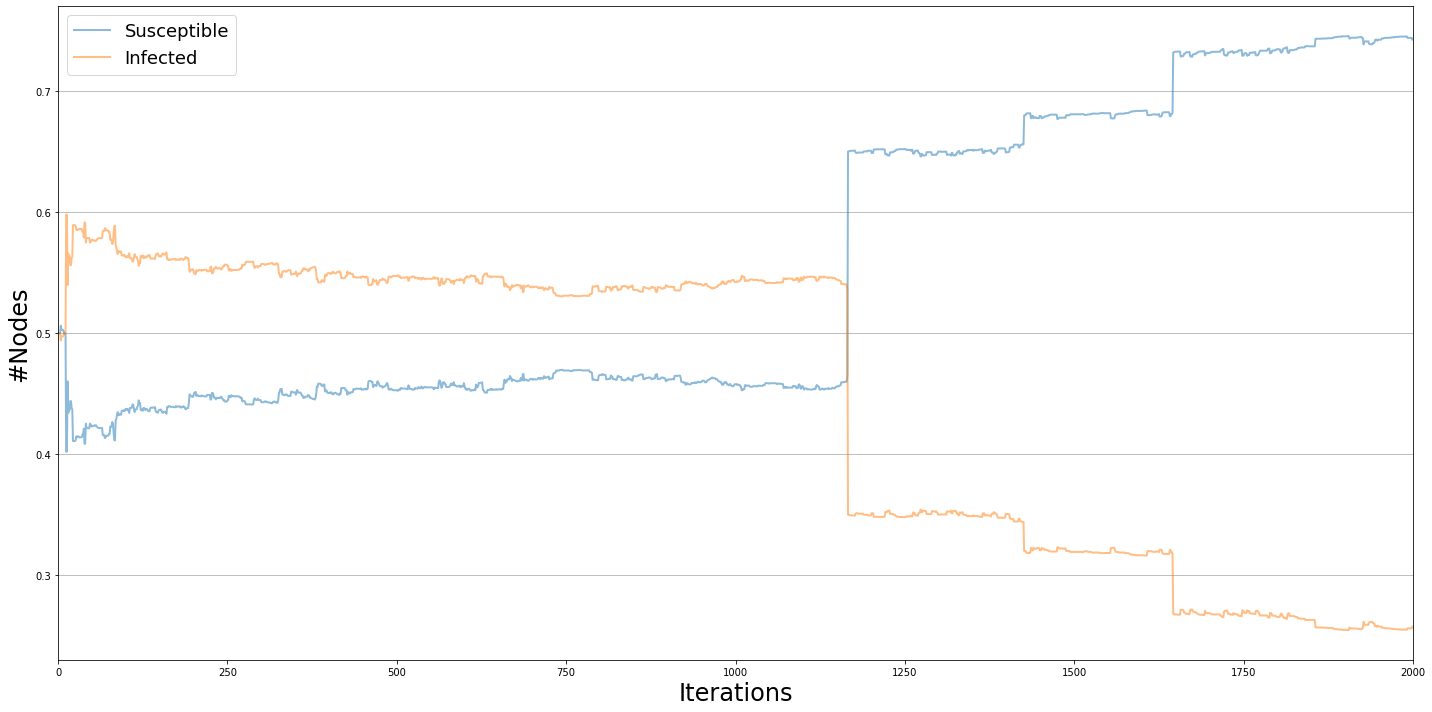

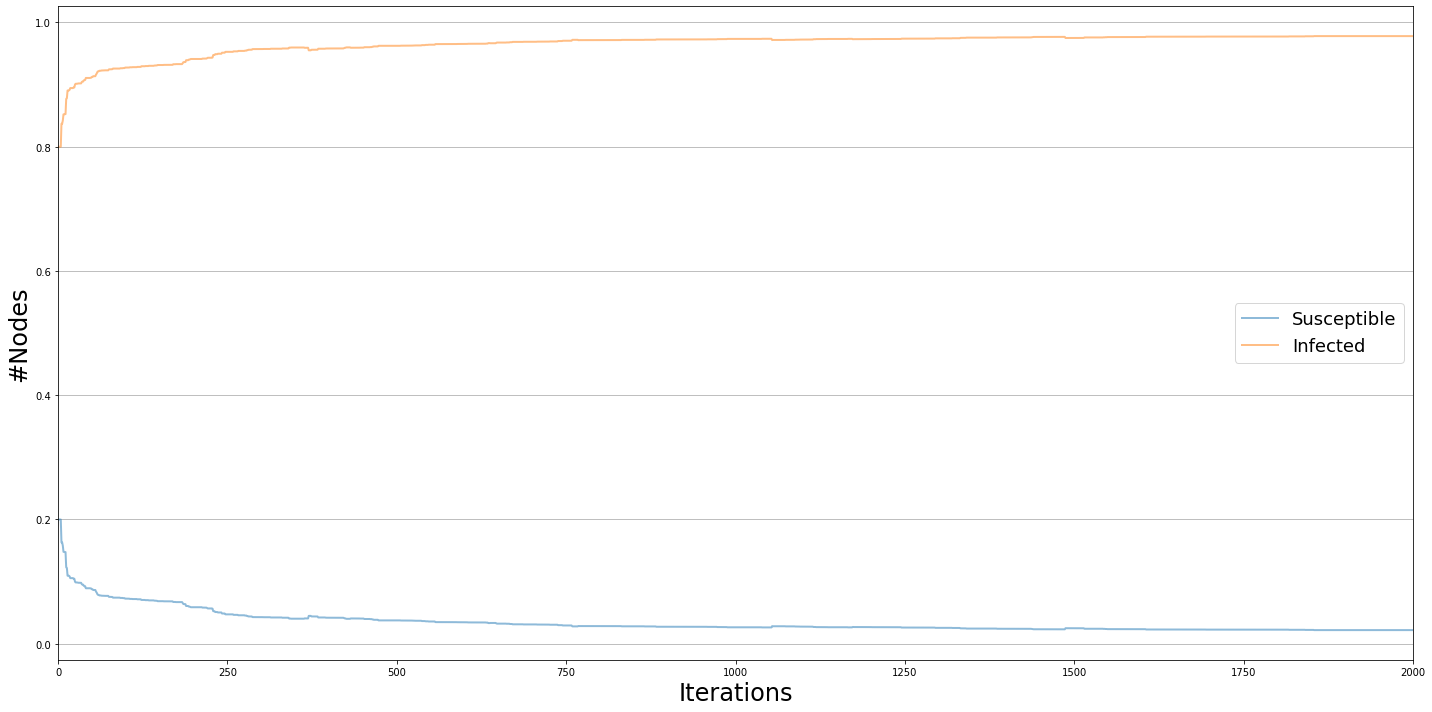

In [25]:
%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz1 = DiffusionTrend(model1, trends1)
viz2 = DiffusionTrend(model2, trends2)
viz3 = DiffusionTrend(model3, trends3)
viz1.plot()
viz2.plot()
viz3.plot()

## Graph vs Erdos-Renyi model

In [26]:
er = nx.erdos_renyi_graph(10184,0.05)

In [27]:
er.number_of_edges()

2594037

### Voter Model

In [28]:
model1 = op.VoterModel(g)
config1 = mc.Configuration()
config1.add_model_parameter('fraction_infected', 0.5)
model1.set_initial_status(config1)
iterations1 = model1.iteration_bunch(2000) #the number of iterations to execute
trends1 = model1.build_trends(iterations1)

model2 = op.VoterModel(er)
config2 = mc.Configuration()
config2.add_model_parameter('fraction_infected', 0.5)
model2.set_initial_status(config2)
iterations2 = model2.iteration_bunch(2000) #the number of iterations to execute
trends2 = model2.build_trends(iterations2)

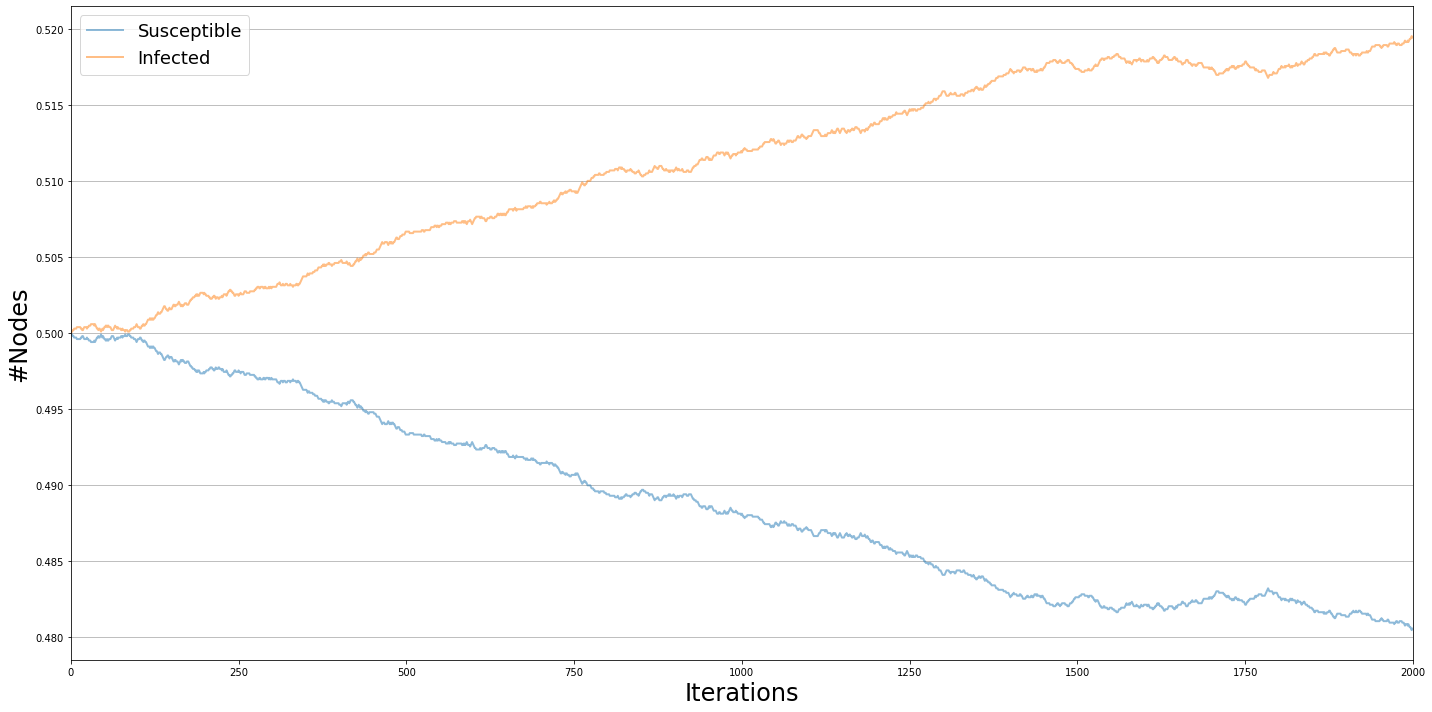

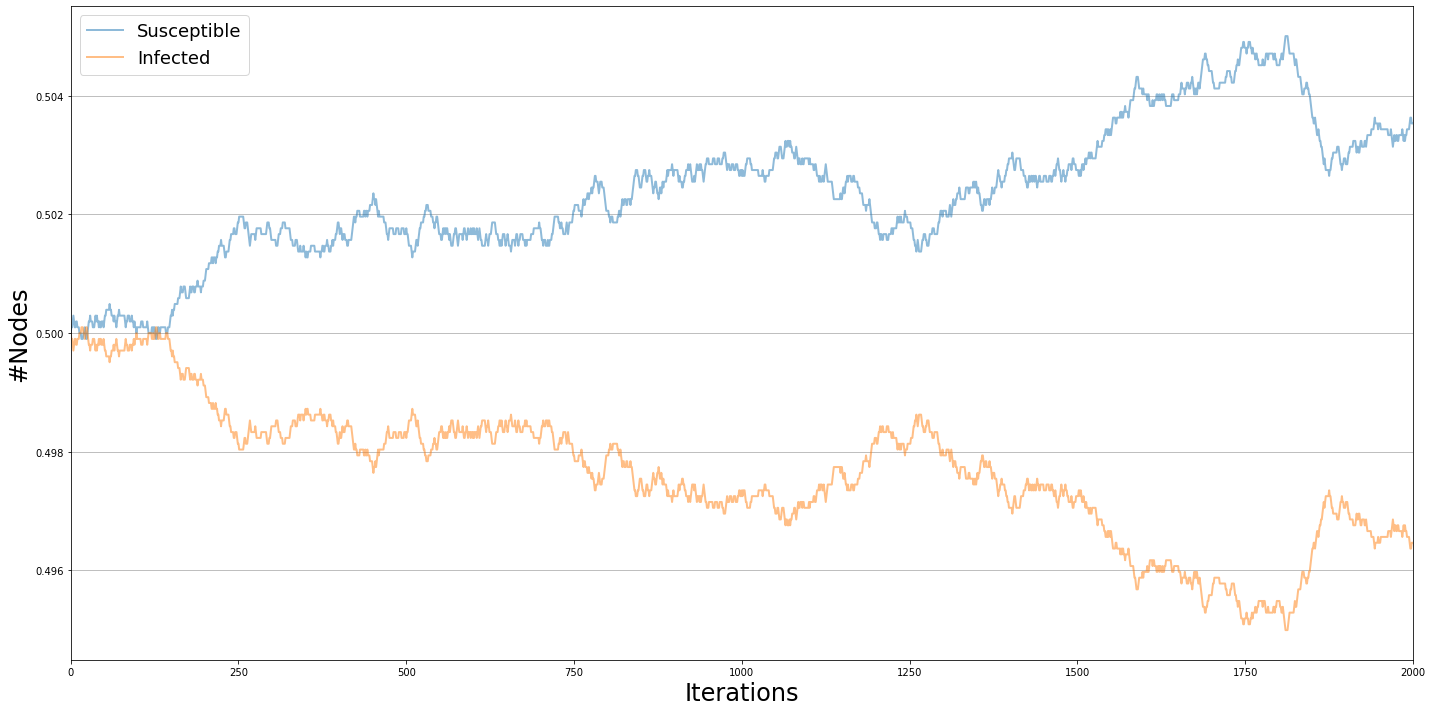

In [29]:
viz1 = DiffusionTrend(model1, trends1)
viz2 = DiffusionTrend(model2, trends2)
viz1.plot()
viz2.plot()

### Majority Rule Model

In [30]:
model1 = op.MajorityRuleModel(g)
config1 = mc.Configuration()
config1.add_model_parameter('q', 5)
config1.add_model_parameter('fraction_infected', 0.5)
model1.set_initial_status(config1)
iterations1 = model1.iteration_bunch(2000)
trends1 = model1.build_trends(iterations1)

model2 = op.MajorityRuleModel(er)
config2 = mc.Configuration()
config2.add_model_parameter('q', 5)
config2.add_model_parameter('fraction_infected', 0.5)
model2.set_initial_status(config2)
iterations2 = model2.iteration_bunch(2000)
trends2 = model2.build_trends(iterations2)

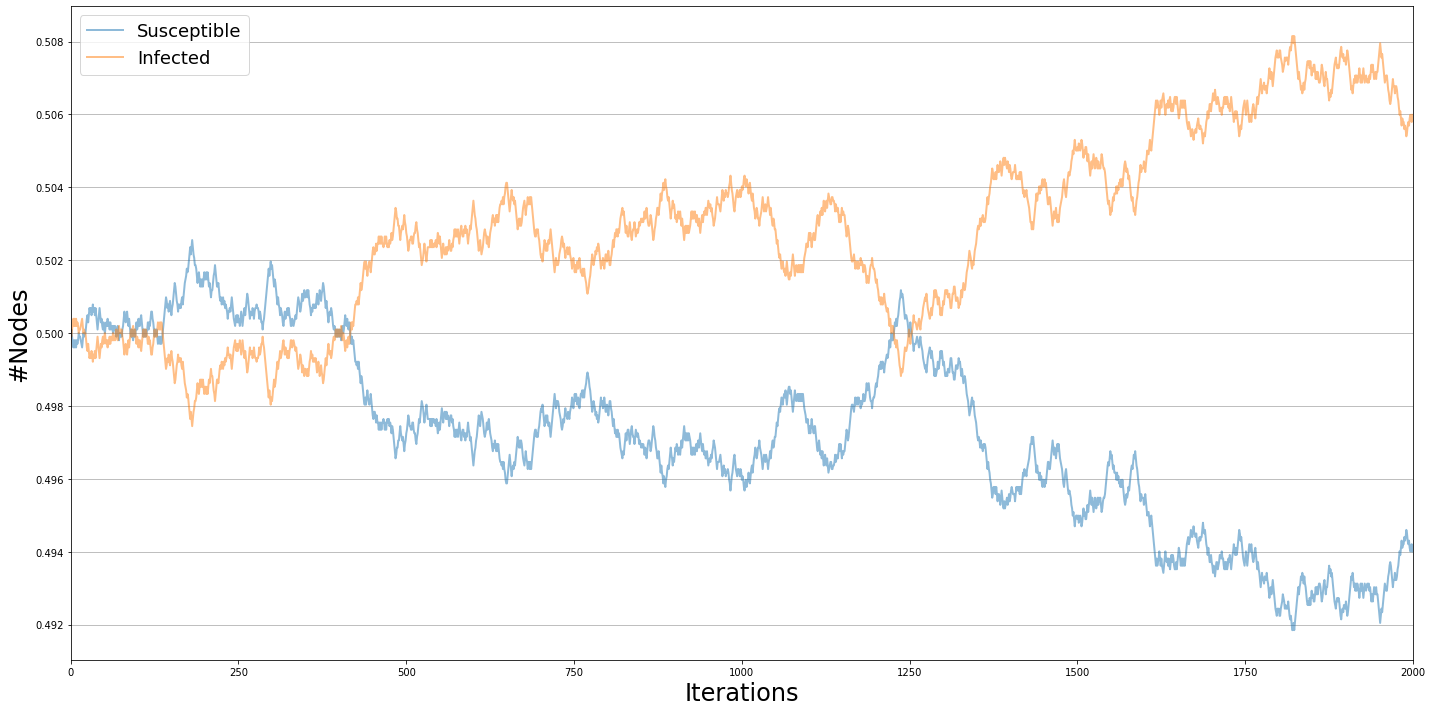

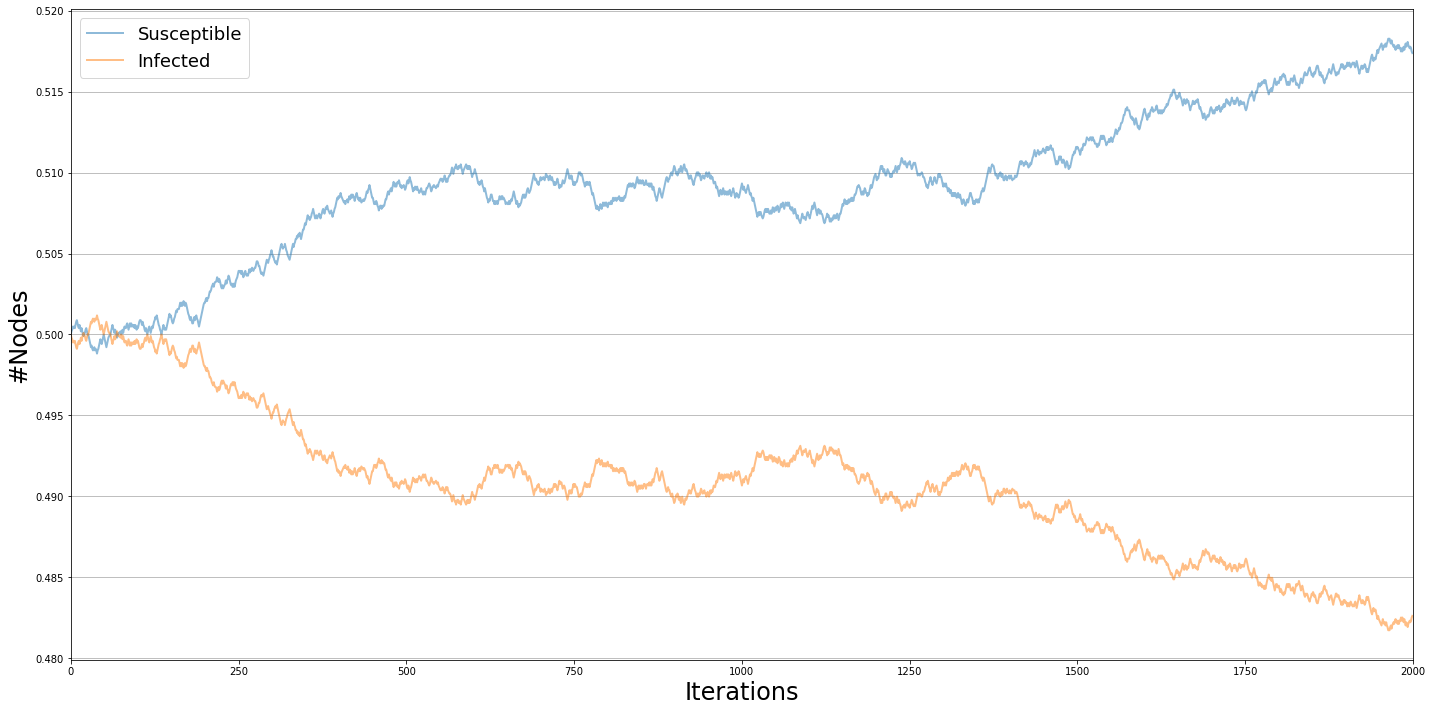

In [31]:
viz1 = DiffusionTrend(model1, trends1)
viz2 = DiffusionTrend(model2, trends2)
viz1.plot()
viz2.plot()

### Sznajd Model

In [32]:
model1 = op.SznajdModel(g)
config1 = mc.Configuration()
config1.add_model_parameter('fraction_infected', 0.5)
model1.set_initial_status(config1)
iterations1 = model1.iteration_bunch(2000) #the number of iterations to execute
trends1 = model1.build_trends(iterations1)

model2 = op.SznajdModel(er)
config2 = mc.Configuration()
config2.add_model_parameter('fraction_infected', 0.5)
model2.set_initial_status(config2)
iterations2 = model2.iteration_bunch(2000) #the number of iterations to execute
trends2 = model2.build_trends(iterations2)


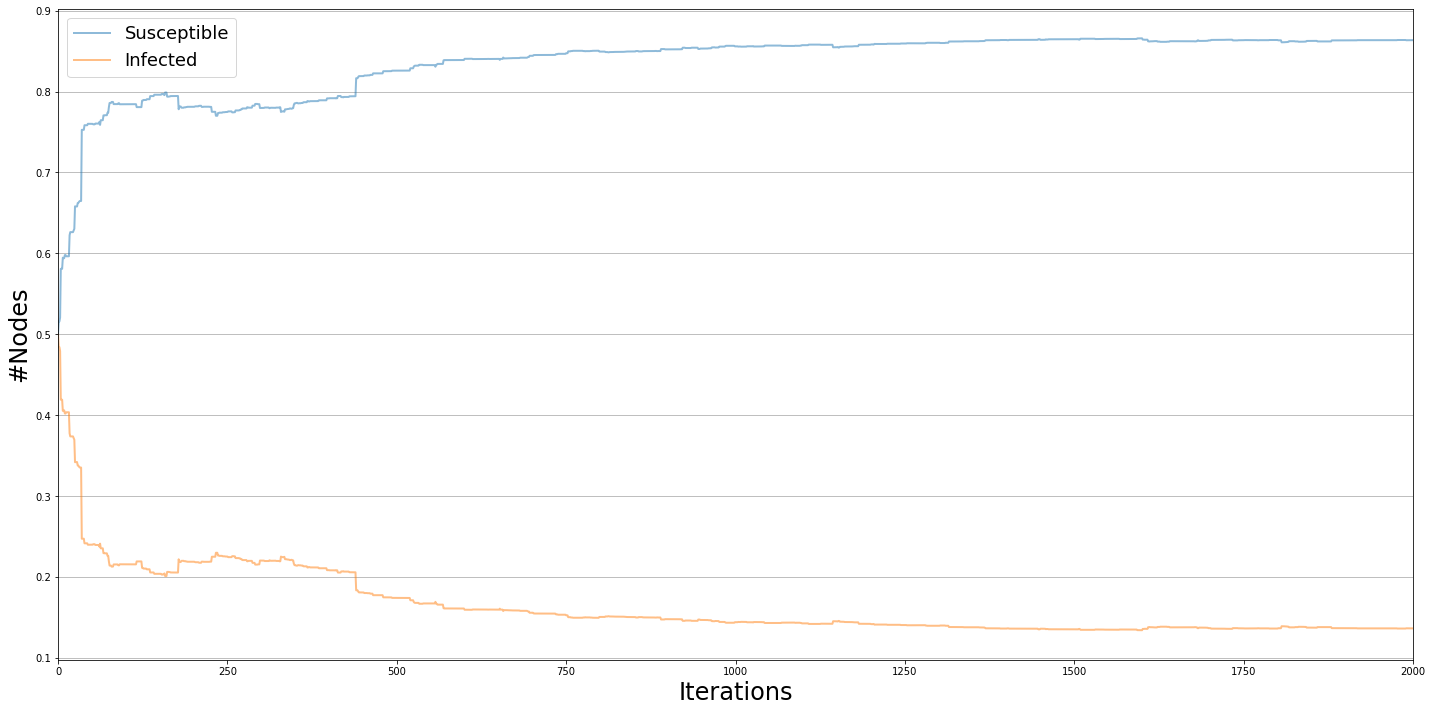

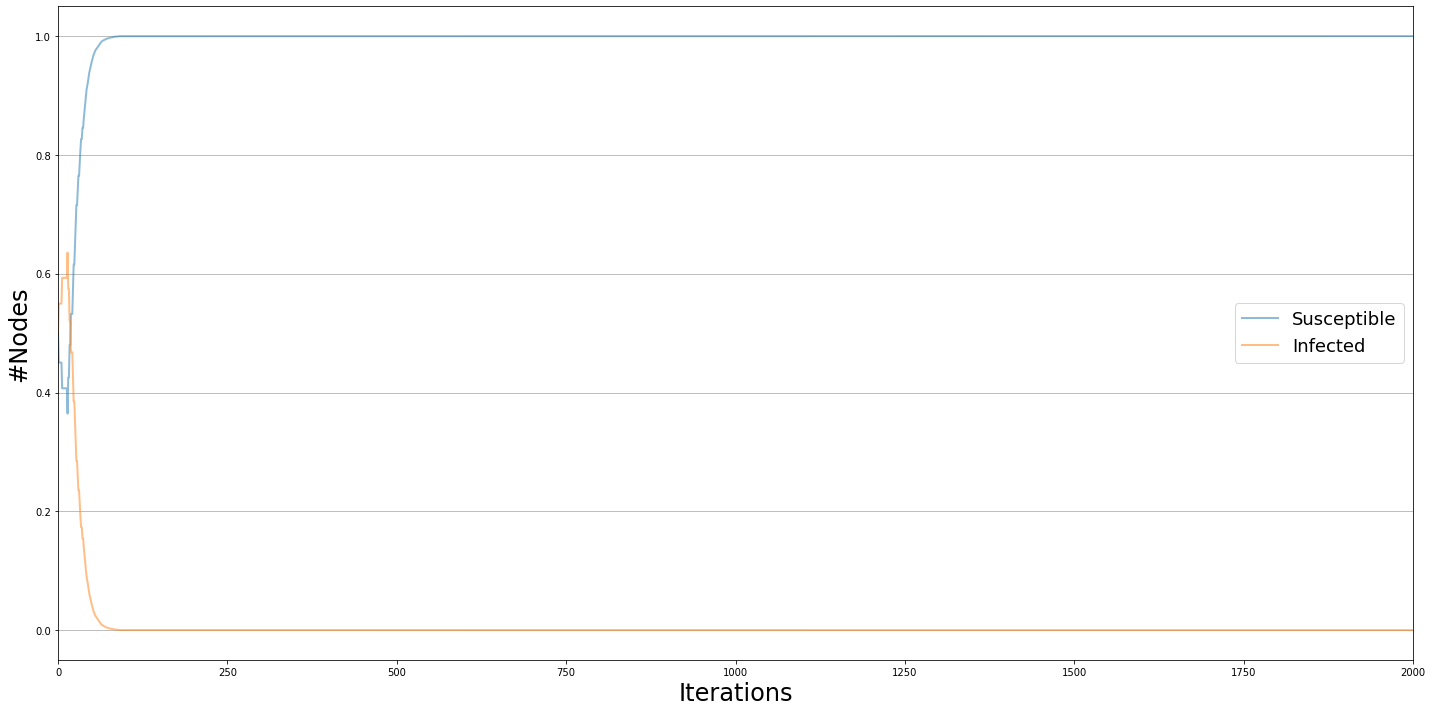

In [33]:
viz1 = DiffusionTrend(model1, trends1)
viz2 = DiffusionTrend(model2, trends2)
viz1.plot()
viz2.plot()